Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [1]:
#Load in the csv. 
import sys 
import pandas as pd
DATA_PATH = '../data/'
df = pd.read_csv(DATA_PATH+'/fatal-police-shootings-data.csv')
print(df.shape)
df.head()

(5408, 14)


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [2]:
#Choose your target. For this, I want to see if I can predict Race.
target = 'race'
print(df['race'].value_counts())
print(df['race'].isnull())
df['race']
#This will be a Classification, there are 6 different races listed. 

W    2473
B    1296
H     902
A      93
N      78
O      48
Name: race, dtype: int64
0       False
1       False
2       False
3       False
4       False
        ...  
5403     True
5404    False
5405    False
5406    False
5407    False
Name: race, Length: 5408, dtype: bool


0         A
1         W
2         H
3         W
4         H
       ... 
5403    NaN
5404      W
5405      W
5406      B
5407      B
Name: race, Length: 5408, dtype: object

In [3]:
#Baseline accuracy. White is the most common race, so its the baseline. 45.73% 
#Accuracy won't be quite good, probably be using Recall/Precision.
2473 / 5408

0.4572855029585799

In [4]:
#Explore the data and clean. A few of these columns likely have little value to the model, like name.
#For the others, lets see how many unique values there are and see how best to handle this.

print(df.armed.value_counts())
print(df.city.value_counts())
print(df.threat_level.value_counts())
print(df.manner_of_death.value_counts())
df.dtypes

gun                    3055
knife                   792
unarmed                 352
toy weapon              185
undetermined            163
                       ... 
air conditioner           1
vehicle and machete       1
hand torch                1
oar                       1
carjack                   1
Name: armed, Length: 93, dtype: int64
Los Angeles        85
Phoenix            77
Houston            56
Las Vegas          45
San Antonio        43
                   ..
Stratford           1
Brooklyn Center     1
Goodbee             1
Wise County         1
Van Wert            1
Name: city, Length: 2468, dtype: int64
attack          3490
other           1679
undetermined     239
Name: threat_level, dtype: int64
shot                5138
shot and Tasered     270
Name: manner_of_death, dtype: int64


id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
dtype: object

In [5]:
#Its possible that we could do some feature engineering
import numpy as np
df.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      227
age                        235
gender                       2
race                       518
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
dtype: int64

In [6]:
def wrangle(X):
    X=X.copy()
    X['date'] = pd.to_datetime(X['date'], infer_datetime_format=True)
    cols_with_nans = ['armed','gender','race','flee']
    cols_for_age = ['age']
    for cols in cols_with_nans:
        X[cols] = X[cols].replace(np.nan, 'Unknown')
    mean = X['age'].dropna().sum() / len(X['age'])
    for cols in cols_for_age:
        X[cols] = X[cols].replace(np.nan, mean)
    return X, mean


In [7]:
wrangled, mean = wrangle(df)
type(wrangled)

pandas.core.frame.DataFrame

In [8]:
#What measure will I use for Observations to Train/Validate/Test. While there is a time component,
#I think I would rather pull randomly.
from sklearn.model_selection import train_test_split

base, test = train_test_split(wrangled, test_size=.15, random_state=1)
train, val = train_test_split(base, test_size=.2, random_state=1)
train.shape, val.shape, test.shape

((3676, 14), (920, 14), (812, 14))

In [9]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

This is resulting in a tuple instead of a dataframe when I do it on the carved up stuff. So note sure what is happening here. So I'm going to carve up the modified dataframe and see if things work.

In [10]:
columns_to_drop = ['id', 'name', 'race', 'date']
X_train = train.drop(columns=columns_to_drop, axis=1)
y_train = train[target]
X_val = val.drop(columns=columns_to_drop, axis=1)
y_val = val[target]
X_test = test.drop(columns=columns_to_drop, axis=1)
y_test = test[target]
X_train.shape, y_train.shape

((3676, 10), (3676,))

In [13]:
#log_reg = LogisticRegression(solver='lbfgs')
rfc = RandomForestClassifier()
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)
#model_rfc = 

#model_log = 

#pipeline = make_pipeline(ce.OrdinalEncoder(),
#                         SimpleImputer(),
#                         RandomForestClassifier(random_state=1))
#pipeline.fit(X_train, y_train)
#print('Test Accuracy:', pipeline.score(X_train, y_train))
#print('Validation Accuracy:', pipeline.score(X_val, y_val))

In [14]:
X_train_encoded.head()

,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera
4160,1,1,26.0,1,1,1,False,1,1,False
7,1,2,35.0,2,2,2,False,1,1,False
572,1,2,49.0,2,3,3,False,1,1,False
360,1,2,18.0,2,4,4,True,1,1,False
1403,1,3,43.0,2,5,5,True,2,1,True


In [15]:
rfc.fit(X_train_encoded, y_train)

RandomForestClassifier()

In [17]:
print('Test Accuracy:', rfc.score(X_train_encoded, y_train))
print('Validation Accuracy:', rfc.score(X_val_encoded, y_val))

Test Accuracy: 0.9964635473340587
Validation Accuracy: 0.46847826086956523


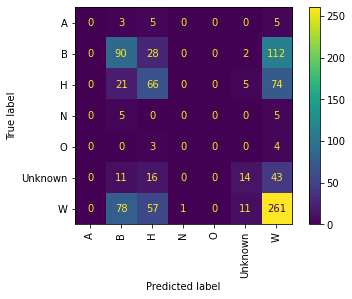

In [18]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc, X_val_encoded, y_val, values_format='.0f',
                     xticks_rotation='vertical');